In [1]:
# Loading the Data

import pandas as pd
 
path= "train.csv"

data =pd.read_csv(path)

In [2]:
print("Dataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  i

In [3]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Drop the 'Id' column as it is irrelevant for prediction
data_cleaned = data.drop(columns=['Id'])


In [5]:
# Separate features (X) and target (y)
X = data_cleaned.drop(columns=['Cover_Type'])
y = data_cleaned['Cover_Type']


In [6]:
# Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)



In [7]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


C:\Users\swanand\AppData\Local\Temp\ipykernel_13668\15306273.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="viridis")


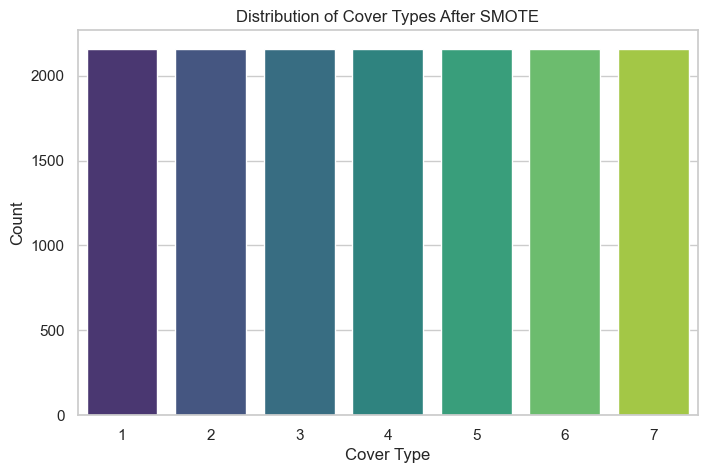

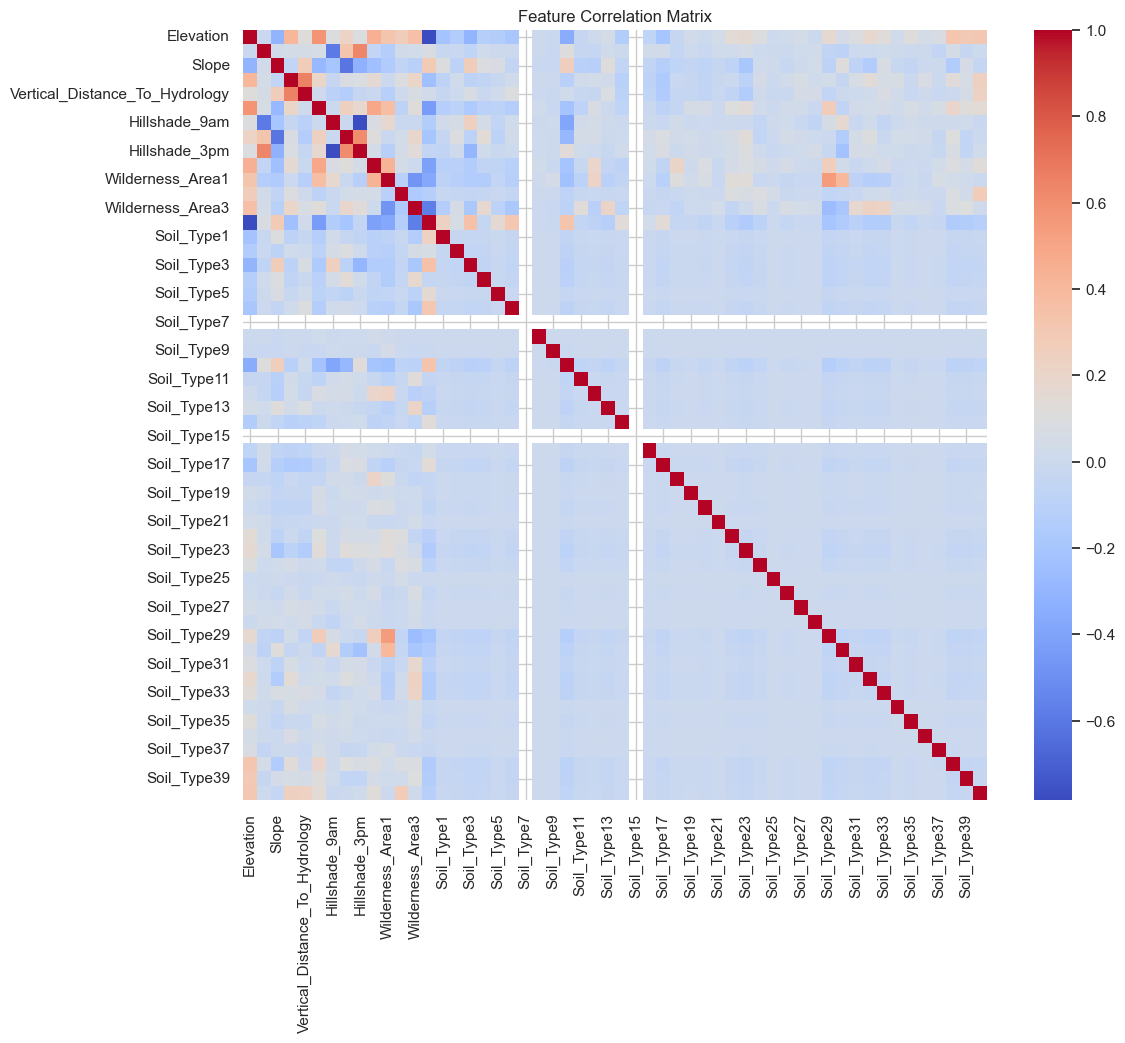

In [8]:
# Plot the distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")


plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled, palette="viridis")
plt.title("Distribution of Cover Types After SMOTE")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
corr_matrix = pd.DataFrame(X_resampled, columns=data_cleaned.columns[:-1]).corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()



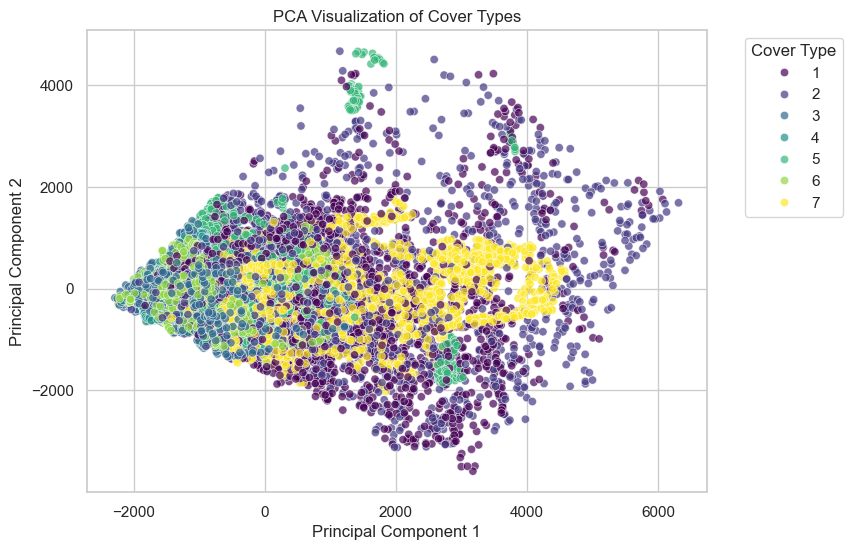

In [9]:
# PCA to visualize high-dimensional data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_resampled, palette="viridis", alpha=0.7)
plt.title("PCA Visualization of Cover Types")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cover Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [10]:
##  Model Development and Hyperparameter Tuning
# Define the Random Forest model

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [11]:
# Best parameters and model
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Train the model with best parameters
best_rf_model.fit(X_train, y_train)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


RandomForestClassifier(n_estimators=300, random_state=42)

In [12]:
# Make predictions
y_pred = best_rf_model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.78      0.78       432
           2       0.80      0.66      0.72       432
           3       0.84      0.79      0.81       432
           4       0.93      0.98      0.95       432
           5       0.88      0.95      0.91       432
           6       0.82      0.88      0.85       432
           7       0.94      0.97      0.95       432

    accuracy                           0.86      3024
   macro avg       0.86      0.86      0.85      3024
weighted avg       0.86      0.86      0.85      3024



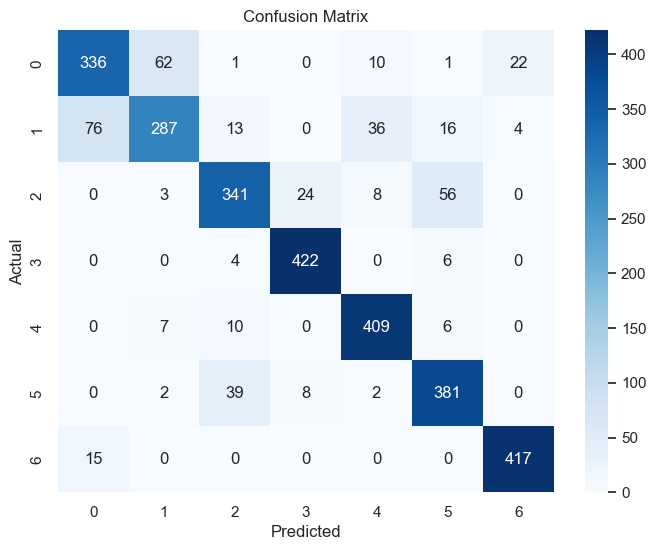

Overall Accuracy: 85.75%
ROC-AUC Score: 0.98


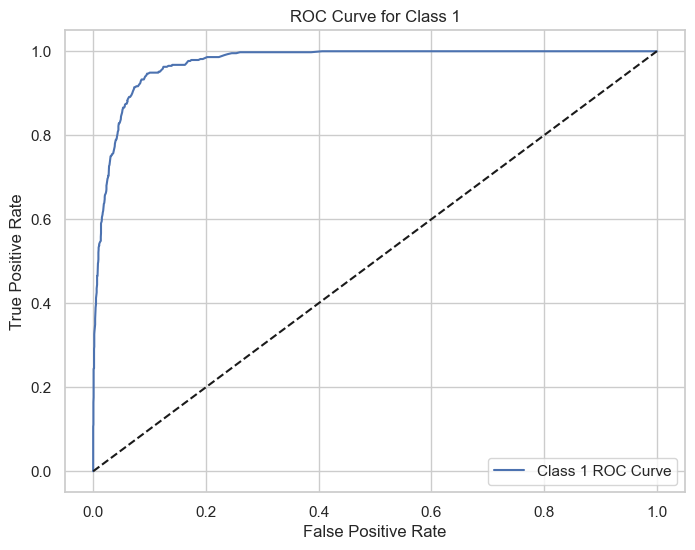

In [13]:
## Step 6: Model Evaluation
# Classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# ROC-AUC score (for multi-class)
roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test), multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot ROC curve (for a sample class, e.g., class 1)
y_prob = best_rf_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 0], pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Class 1 ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve for Class 1")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()



In [14]:
# Save the trained model using joblib
import joblib

joblib.dump(best_rf_model, "optimized_forest_cover_model.pkl")


['optimized_forest_cover_model.pkl']

In [15]:
# Save the scaler for future use
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']